In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import arviz as az

In [2]:
# zad 1
model1 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_1.stan')
model2 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_2.stan')
model3 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_3.stan')
model4 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_4.stan')
model5 = CmdStanModel(stan_file='D:\Studia\DataAnalytics\DataAnalytics\lab7\code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
L = 7
F = 5
N = (L+F)*100

In [4]:

fit_1 = model1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit_2 = model2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

y1 = fit_1.stan_variable('y')
y2 = fit_2.stan_variable('y')

                            

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:13 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
# zad 2
fit_3 = model3.sample(data={'N':N, 'y':y1[0]} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit_4 = model4.sample(data={'N':N, 'y':y1[0]} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


       rank         loo  p_loo      d_loo  weight         se       dse  \
fit_4     0 -2583.00807    0.0    0.00000     1.0  15.012027  0.000000   
fit_3     1 -3515.64573    0.0  932.63766     0.0  10.829452  6.852645   

       warning loo_scale  
fit_4     True       log  
fit_3     True       log  
       rank        waic        p_waic     d_waic  weight         se       dse  \
fit_4     0 -2583.00807  1.150277e-24    0.00000     1.0  15.012027  0.000000   
fit_3     1 -3515.64573  2.070490e-24  932.63766     0.0  10.829452  6.852645   

       warning waic_scale  
fit_4    False        log  
fit_3    False        log  


<AxesSubplot:xlabel='Log'>

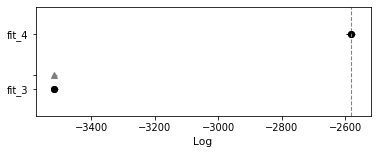

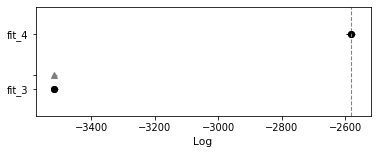

In [6]:
compare_dict = {'fit_3': fit_3, 'fit_4': fit_4}
loo_compare = az.compare(compare_dict, ic="loo")
waic_compare = az.compare(compare_dict, ic="waic")

print(loo_compare)
print(waic_compare)

az.plot_compare(loo_compare)
az.plot_compare(waic_compare)

In [42]:
#zad 3
x2 = fit_2.stan_variable('X')
x2_1 = x2.reshape(1000,-1)[0:1,:1200]
x2_1 = np.transpose(x2_1)

x2_2 = x2.reshape(1000,-1)[0:2,:1200]
x2_2 = np.transpose(x2_2)

x2_3 = x2.reshape(1000,-1)[0:3,:1200]
x2_3 = np.transpose(x2_3)

print(np.shape(x2_1))
print(np.shape(y2[0]))

(1200, 1)
(1200,)


In [43]:
fit_5_1 = model5.sample(data={'N':N, 'K': 1, 'y':y2[0],'X':x2_1} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)


fit_5_2 = model5.sample(data={'N':N, 'K': 2, 'y':y2[0],'X':x2_2} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
                            

fit_5_3 = model5.sample(data={'N':N, 'K': 3, 'y':y2[0],'X':x2_3} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:10 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:09 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:10 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto 

         rank           loo  p_loo         d_loo    weight           se  \
fit_5_1     0 -14808.188193    0.0      0.000000  0.370444   570.727904   
fit_5_2     1 -14808.188193    0.0      0.000000  0.370444   570.727904   
fit_5_3     2 -44845.000598    0.0  30036.812405  0.259111  1815.513733   

                 dse  warning loo_scale  
fit_5_1     0.000000     True       log  
fit_5_2     0.000000     True       log  
fit_5_3  1658.433131     True       log  
         rank          waic        p_waic        d_waic    weight  \
fit_5_1     0 -14808.188193  1.034626e-22      0.000000  0.370444   
fit_5_2     1 -14808.188193  1.034626e-22      0.000000  0.370444   
fit_5_3     2 -44845.000598  1.020123e-21  30036.812405  0.259111   

                  se          dse  warning waic_scale  
fit_5_1   570.727904     0.000000    False        log  
fit_5_2   570.727904     0.000000    False        log  
fit_5_3  1815.513733  1658.433131    False        log  


<AxesSubplot:xlabel='Log'>

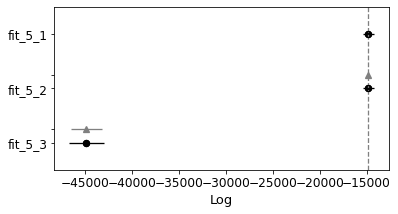

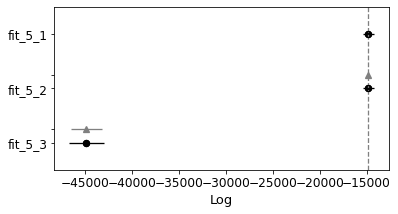

In [44]:
compare_dict = {'fit_5_1': fit_5_1, 'fit_5_2': fit_5_1, 'fit_5_3': fit_5_3}
loo_compare = az.compare(compare_dict, ic="loo")
waic_compare = az.compare(compare_dict, ic="waic")

print(loo_compare)
print(waic_compare)

az.plot_compare(loo_compare)
az.plot_compare(waic_compare)